#### Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset

In [4]:
df = pd.read_excel('cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [7]:
df.shape

(30000, 38)

In [6]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

### Data Preprocessing

#### 1) Handle Null values

In [8]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [9]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [10]:
df['Gender'].fillna('Unknown',inplace=True)
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

In [12]:
df.iloc[:,1:].describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [13]:
df.iloc[:,3:].apply(lambda x : x.max(),axis=0)

Jordan                     24
Gatorade                   15
Samsung                    27
Asus                       17
Udis                       14
Mondelez International     31
Wrangler                    9
Vans                       16
Fila                       15
Brooks                     12
H&M                        18
Dairy Queen               114
Fendi                      18
Hewlett Packard            10
Pladis                     26
Asics                      66
Siemens                    11
J.M. Smucker               64
Pop Chips                  21
Juniper                    79
Huawei                     44
Compaq                     30
IBM                        11
Burberry                   37
Mi                          9
LG                         19
Dior                       12
Scabal                     11
Tommy Hilfiger              8
Hollister                   9
Forever 21                  8
Colavita                   22
Microsoft                  14
Jiffy mix 

### Analysis based on Gender

In [14]:
df['Gender'].value_counts()

F          22054
M           5222
Unknown     2724
Name: Gender, dtype: int64

In [15]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [16]:
df.groupby('Gender').agg({'Orders':['min','max','sum','mean'],
                         'Samsung':['min','max'],
                         'Pop Chips':['min','max'],
                         'IBM':['min','max'],
                         'Tommy Hilfiger':['min','max'],
                         'Microsoft':['min','max']})

Orders                      Samsung     Pop Chips     IBM      \
           min max    sum      mean     min max       min max min max   
Gender                                                                  
F            0  12  93313  4.231115       0  27         0  21   0   8   
M            0  12  22464  4.301800       0  22         0  18   0  11   
Unknown      0  12   9317  3.420338       0  13         0   8   0   3   

        Tommy Hilfiger     Microsoft      
                   min max       min max  
Gender                                    
F                    0   8         0  14  
M                    0   5         0   9  
Unknown              0   8         0   4

#### Order Bins

In [17]:
df['Order_Bins'] = pd.cut(df['Orders'],bins=[0,3,6,9,12])
df['Order_Bins'].value_counts()

(0, 3]     7337
(6, 9]     6280
(3, 6]     6241
(9, 12]    2848
Name: Order_Bins, dtype: int64

In [18]:
df.groupby(['Order_Bins']).agg({'IBM':['max','mean'],
                                'Samsung':['max','mean'],
                                'Microsoft':['max','mean'],
                               'Siemens':['max','mean']})

IBM           Samsung           Microsoft           Siemens  \
           max      mean     max      mean       max      mean     max   
Order_Bins                                                               
(0, 3]       5  0.031212      15  0.232520         9  0.119259      11   
(3, 6]       4  0.033488      27  0.245794        11  0.127223       7   
(6, 9]       8  0.028025      26  0.229936        12  0.115127       8   
(9, 12]     11  0.028792      22  0.237711         9  0.130267       9   

                      
                mean  
Order_Bins            
(0, 3]      0.041025  
(3, 6]      0.049031  
(6, 9]      0.054936  
(9, 12]     0.049860

### Outlier Treatment

In [19]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft', 'Order_Bins'],
      dtype='object')

In [20]:
a  = df.iloc[:,3:].describe(percentiles=[0.01,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,3%,5%,50%,95%,97%,98%,99%,max
Jordan,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.00,4.0,24.0
Gatorade,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.00,3.0,15.0
Samsung,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.00,5.0,27.0
Asus,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.00,4.0,17.0
Udis,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.00,3.0,14.0
Mondelez International,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.00,2.0,31.0
Wrangler,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.00,3.0,9.0
Vans,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.00,2.0,16.0
Fila,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,3.0,15.0
Brooks,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.02,2.0,12.0


In [21]:
print(df[df['Dairy Queen']>4].shape)
print(df[df['Colavita']>3].shape)
print(df[df['J.M. Smucker']>5.0].shape)

(192, 39)
(135, 39)
(224, 39)


In [22]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.99))
    return x

In [23]:
df.columns[3:]

Index(['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft',
       'Order_Bins'],
      dtype='object')

In [24]:
df[df.columns[3:]] = df[df.columns[3:]].apply(outlier_treatment)

In [25]:
a  = df.iloc[:,3:].describe(percentiles=[0.01,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,3%,5%,50%,95%,97%,98%,99%,max
Jordan,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.00,4.0,4.0
Gatorade,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.00,3.0,3.0
Samsung,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.00,5.0,5.0
Asus,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.00,4.0,4.0
Udis,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.00,3.0,3.0
Mondelez International,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.00,2.0,2.0
Wrangler,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.00,3.0,3.0
Vans,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.00,2.0,2.0
Fila,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,3.0,3.0
Brooks,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.02,2.0,2.0


In [26]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft', 'Order_Bins'],
      dtype='object')

In [28]:
data = df.iloc[:,2:38]  # Excluding columns - Cust_ID,Gender,Order_Bins
print(data.columns)
print(data.shape)

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')
(30000, 36)


### Elbow Method

In [29]:
from sklearn.cluster import KMeans

In [30]:
# within cluster sum of square
wcss = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(data)
    wcss.append(model.inertia_)
    
# model.inertia_ returns the WCSS values
print('WCSS\n',wcss)

WCSS
 [709585.0647333326, 407690.48447702464, 359374.79799017793, 342801.7513922415, 328585.5103256974, 320225.7603299719, 312971.19392225787, 306581.5679130327, 301132.82796365774, 294400.93828415975, 289697.75404957926, 285299.9925518089, 281519.2464297402, 276833.335892868]


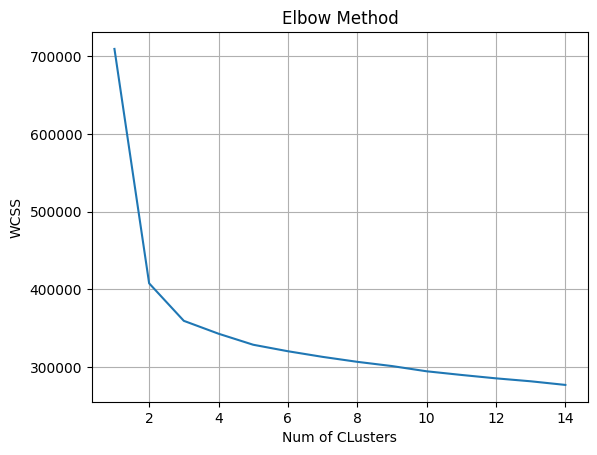

In [31]:
plt.plot(list(range(1,15)),wcss)
plt.title('Elbow Method')
plt.xlabel('Num of CLusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### Inference
2 or 3 is the optimal num of clusters

### Silhouette Score

In [32]:
from sklearn.metrics import silhouette_score

In [ ]:
# (b-a)/max(a,b)

In [ ]:
# Git(Service) and Github(Service Provider)
# Version Control System
# repository - github repo

In [33]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i,random_state=0).fit(data)
    print(f'Silhoutte Score at K={i}',silhouette_score(data,m.labels_))

Silhoutte Score at K=2 0.36861902304223737
Silhoutte Score at K=3 0.22611071851223624
Silhoutte Score at K=4 0.1491850420859772
Silhoutte Score at K=5 0.16891887709484743
Silhoutte Score at K=6 0.14782698101782285
Silhoutte Score at K=7 0.1393136071800743
Silhoutte Score at K=8 0.14320048182913764
Silhoutte Score at K=9 0.11095300182171325


### Applying KMeans at K=2

In [34]:
k2 = KMeans(n_clusters=2)
k2.fit(data)

KMeans(n_clusters=2)

In [36]:
ypred_k2 = k2.predict(data)
print(ypred_k2[:10])

[1 0 1 0 1 0 1 1 0 0]


In [37]:
from collections import Counter

In [38]:
c1 = Counter(ypred_k2)
print(c1)

Counter({0: 16823, 1: 13177})


In [39]:
cent2 = k2.cluster_centers_
print(cent2.shape)
print(cent2)

(2, 36)
[[1.36271771 0.24139571 0.22249302 0.19455507 0.13368603 0.12013315
  0.12304583 0.09492956 0.085181   0.08298163 0.12661238 0.29768769
  0.18129941 0.11757713 0.14111633 0.09611841 0.25780182 0.039232
  0.70272841 0.22070974 0.42489449 0.23533258 0.09421625 0.0219937
  0.39511383 0.11323783 0.09183855 0.25066873 0.35445521 0.14141354
  0.06853712 0.04571123 0.17773287 0.10319206 0.07751293 0.06348452]
 [7.75358579 0.26766335 0.2546862  0.21499583 0.15519466 0.12817789
  0.12825378 0.0990362  0.091599   0.07922896 0.13432496 0.34355316
  0.1787205  0.13273127 0.15299385 0.09584883 0.28845716 0.04287774
  0.76557638 0.23844578 0.43712529 0.24853912 0.10161645 0.01866889
  0.42194733 0.12112013 0.08203688 0.26333763 0.38142218 0.14851635
  0.06989451 0.04431965 0.18236321 0.11087501 0.08279578 0.05828337]]


In [40]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [41]:
df4['Cls2'] = ypred_k2
df4.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_Bins,Cls2
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(6.0, 9.0]",1
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,"(6.0, 9.0]",1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
4,5,Unknown,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,"(9.0, 12.0]",1


In [42]:
df4['Cls2'].value_counts()

0    16823
1    13177
Name: Cls2, dtype: int64

### Cluster Profiling

In [43]:
r1 = df4.iloc[:,2:].groupby('Cls2').mean()
r1

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cls2,,,,,,,,,,,,,,,,,,,,,
0,1.362718,0.241396,0.222493,0.194555,0.133686,0.120133,0.123046,0.094930,0.085181,0.082982,...,0.091839,0.250669,0.354455,0.141414,0.068537,0.045711,0.177733,0.103192,0.077513,0.063485
1,7.753586,0.267663,0.254686,0.214996,0.155195,0.128178,0.128254,0.099036,0.091599,0.079229,...,0.082037,0.263338,0.381422,0.148516,0.069895,0.044320,0.182363,0.110875,0.082796,0.058283


In [49]:
r2 = df4.iloc[:,2:-1:].mean().reset_index().T
r2.columns = r2.loc['index']
r2 = r2.iloc[1:,:]
r2.index = ['Mean']
r2

index,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Mean,4.1698,0.252933,0.236633,0.203533,0.143133,0.123667,0.125333,0.096733,0.088,0.081333,...,0.087533,0.256233,0.3663,0.144533,0.069133,0.0451,0.179767,0.106567,0.079833,0.0612


In [50]:
# r2 = df4.iloc[:,2:-1:].mean().reset_index().T
# r2.columns = r2.loc['index']
# r2 = r2.iloc[1:,:]
# r2.index = ['Mean']
# r2

In [51]:
res = pd.concat([r2,r1]).T
res

,Mean,0,1
Orders,4.1698,1.362718,7.753586
Jordan,0.252933,0.241396,0.267663
Gatorade,0.236633,0.222493,0.254686
Samsung,0.203533,0.194555,0.214996
Asus,0.143133,0.133686,0.155195
Udis,0.123667,0.120133,0.128178
Mondelez International,0.125333,0.123046,0.128254
Wrangler,0.096733,0.09493,0.099036
Vans,0.088,0.085181,0.091599
Fila,0.081333,0.082982,0.079229


In [59]:
def K_cluster_analysis(k,table):
    model = KMeans(n_clusters=k,random_state=0)
    model.fit(table)
    ypred = model.predict(table)
    print(Counter(ypred))
    cent = model.cluster_centers_
    table[f'Cls{k}'] = ypred
    r1 = table.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns = r1.loc['index']
    r1 = r1.iloc[1:,]
    r1.index = ['Mean']
    r2 = table.groupby(f'Cls{k}').mean()
    cls_analysis = pd.concat([r1,r2]).T
    return cls_analysis

In [60]:
data1 = data.copy()
data2 = data.copy()

In [61]:
cls3_report = K_cluster_analysis(3,data1)
cls3_report

Counter({2: 12432, 1: 9128, 0: 8440})


,Mean,0,1,2
Orders,4.1698,4.460782,8.751643,0.608108
Jordan,0.252933,0.269076,0.264351,0.233591
Gatorade,0.236633,0.260545,0.253615,0.207931
Samsung,0.203533,0.222512,0.210232,0.18573
Asus,0.143133,0.150948,0.155237,0.128941
Udis,0.123667,0.127962,0.127739,0.117761
Mondelez International,0.125333,0.13128,0.12741,0.119772
Wrangler,0.096733,0.100829,0.09816,0.092905
Vans,0.088,0.091114,0.090162,0.084299
Fila,0.081333,0.079384,0.077673,0.085344


In [62]:
cls2_report = K_cluster_analysis(2,data2)
cls2_report

Counter({0: 16823, 1: 13177})


,Mean,0,1
Orders,4.1698,1.362718,7.753586
Jordan,0.252933,0.241396,0.267663
Gatorade,0.236633,0.222493,0.254686
Samsung,0.203533,0.194555,0.214996
Asus,0.143133,0.133686,0.155195
Udis,0.123667,0.120133,0.128178
Mondelez International,0.125333,0.123046,0.128254
Wrangler,0.096733,0.09493,0.099036
Vans,0.088,0.085181,0.091599
Fila,0.081333,0.082982,0.079229
